In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1 Read Data

In [2]:
raw_path = 'anime.csv' #local lacation

In [3]:
raw_data = pd.read_csv(raw_path)
raw_data

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,...,Unknown,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,...,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


# 2 One Hot Encoding

### 2.1 Genre

In [4]:
gen_dic = {}
for i in raw_data['Genres']:
  genre = i.split(', ')
  for m in genre:
    if m in gen_dic.keys():
      gen_dic[m] += 1
    else:
      gen_dic[m] = 1
df_genres = pd.DataFrame(gen_dic.items(), columns=['Genres', 'Count'])
print(df_genres.shape)
df_genres.head()

(44, 2)


,Genres,Count
0,Action,3888
1,Adventure,2957
2,Comedy,6029
3,Drama,2619
4,Sci-Fi,2583


In [5]:
# one hot encode genres
df_encoded_genres = raw_data['Genres'].str.get_dummies(sep=', ')
print(df_encoded_genres.shape)
df_encoded_genres

(17562, 44)


,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri
0,1,1,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17558,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17559,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
17560,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [6]:
df_encoded_genres.columns
new_name = ['(genre)'+i for i in df_encoded_genres.columns]
df_encoded_genres.columns = new_name 
df_encoded_genres

,(genre)Action,(genre)Adventure,(genre)Cars,(genre)Comedy,(genre)Dementia,(genre)Demons,(genre)Drama,(genre)Ecchi,(genre)Fantasy,(genre)Game,...,(genre)Slice of Life,(genre)Space,(genre)Sports,(genre)Super Power,(genre)Supernatural,(genre)Thriller,(genre)Unknown,(genre)Vampire,(genre)Yaoi,(genre)Yuri
0,1,1,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17558,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17559,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
17560,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


As we can see, there is 84 genres

### 2.2 Producer

In [9]:
prod_dic = {}
for i in raw_data['Producers']:
  producer = i.split(', ')
  for m in producer:
    if m in prod_dic.keys():
      prod_dic[m] += 1
    else:
      prod_dic[m] = 1
df_producers = pd.DataFrame(prod_dic.items(), columns=['Producer', 'Count'])
print(df_producers.shape)
df_producers.head()

(1307, 2)


,Producer,Count
0,Bandai Visual,416
1,Sunrise,12
2,Victor Entertainment,85
3,TV Tokyo,476
4,Dentsu,293


num of works by the larggest producer: 7794
proportion of producer that produces over 50 works: 0.06885998469778118


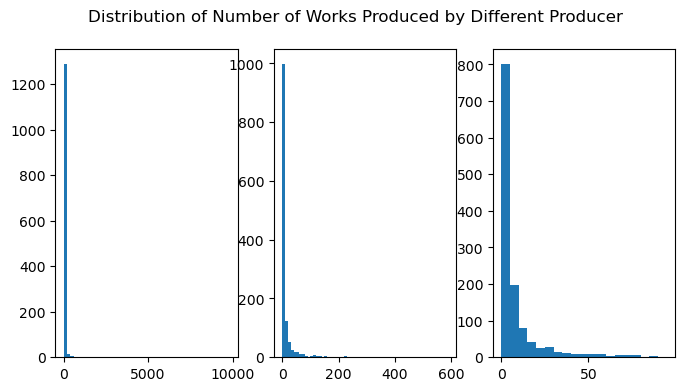

In [10]:
bins1 = list(np.arange(0, 10000, 200))
bins2 = list(np.arange(0, 600, 10))
bins3 = list(np.arange(0, 100, 5))

print('num of works by the larggest producer:' , max(df_producers['Count']))
fig, axs = plt.subplots(1, 3, figsize=(8, 4))
fig.suptitle('Distribution of Number of Works Produced by Different Producer')
axs[0].hist(df_producers['Count'], bins = bins1);
axs[1].hist(df_producers['Count'], bins = bins2);
axs[2].hist(df_producers['Count'], bins = bins3);
print('proportion of producer that produces over 50 works:' , len(df_producers[df_producers['Count']>50])/len(df_producers['Count']))

In [11]:
df_producers_selected = df_producers[df_producers.Count > 400] #here we only select major producers
df_producers_selected

,Producer,Count
0,Bandai Visual,416
3,TV Tokyo,476
10,Unknown,7794
16,Aniplex,495
53,Lantis,445
85,NHK,715


In [12]:
# one hot encode producers and filter out the major producers
df_encoded_producers = raw_data['Producers'].str.get_dummies(sep=', ')
# df_encoded_producers = df_encoded_producers.loc[:, df_producers_selected['Producer'].values]
print(df_encoded_producers.shape)
df_encoded_producers.head()

(17562, 1307)


,12 Diary Holders,1st PLACE,1theK,3xCube,4Kids Entertainment,5pb.,81 Produce,A-1 Pictures,A-Craft,A-Line,...,indigo line,it's,m.o.e.,monofilmo,pH Studio,project lights,studioGONG,syn Sophia,teamKG,voque ting
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_encoded_producers.columns
new_name = ['(producers)'+i for i in df_encoded_producers.columns]
df_encoded_producers.columns = new_name 
df_encoded_producers

,(producers)12 Diary Holders,(producers)1st PLACE,(producers)1theK,(producers)3xCube,(producers)4Kids Entertainment,(producers)5pb.,(producers)81 Produce,(producers)A-1 Pictures,(producers)A-Craft,(producers)A-Line,...,(producers)indigo line,(producers)it's,(producers)m.o.e.,(producers)monofilmo,(producers)pH Studio,(producers)project lights,(producers)studioGONG,(producers)syn Sophia,(producers)teamKG,(producers)voque ting
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17560,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
print(df_encoded_producers.columns)

Index(['(producers)12 Diary Holders', '(producers)1st PLACE',
       '(producers)1theK', '(producers)3xCube',
       '(producers)4Kids Entertainment', '(producers)5pb.',
       '(producers)81 Produce', '(producers)A-1 Pictures',
       '(producers)A-Craft', '(producers)A-Line',
       ...
       '(producers)indigo line', '(producers)it's', '(producers)m.o.e.',
       '(producers)monofilmo', '(producers)pH Studio',
       '(producers)project lights', '(producers)studioGONG',
       '(producers)syn Sophia', '(producers)teamKG', '(producers)voque ting'],
      dtype='object', length=1307)


### 2.3 Episodes

Japanese Anime: Short(like OVA, only 1-7 episodes), Seasonal(10 - 13), Half Year (~26), and Superlong(>26)

proportion of superlong animes: 0.04581720051625015


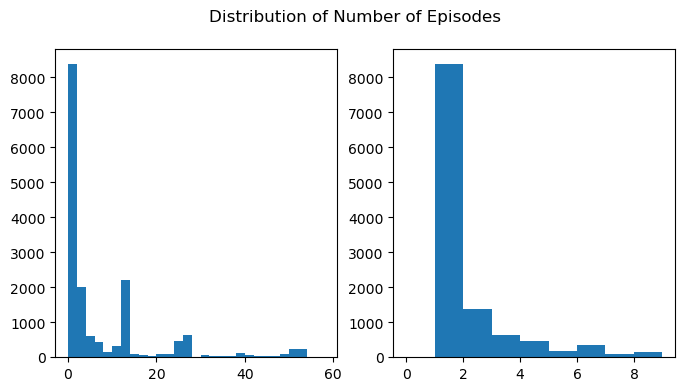

In [15]:
Episode_stat = raw_data['Episodes'][raw_data['Episodes'] != 'Unknown']
Episode_stat = np.array([int(i) for i in Episode_stat])

bins1 = list(np.arange(0, 60, 2))
bins2 = list(np.arange(0, 10, 1))

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Distribution of Number of Episodes')
axs[0].hist(Episode_stat, bins = bins1);
axs[1].hist(Episode_stat, bins = bins2);

print('proportion of superlong animes:' , len(Episode_stat[Episode_stat>50])/len(Episode_stat))

In [16]:
#Type Analyis for those with only less than 13 episodes
episode_candidates = np.arange(0, 50)
episode_candidates = [str(i) for i in episode_candidates]
for i in range(15):
    df_current_episode = raw_data[raw_data['Episodes'] == episode_candidates[i]]
    print('num of episodes =', i+1, ':', dict(df_current_episode['Type'].value_counts()))

num of episodes = 1 : {}
num of episodes = 2 : {'Movie': 2964, 'OVA': 1926, 'Music': 1413, 'Special': 1399, 'ONA': 678, 'Unknown': 1}
num of episodes = 3 : {'OVA': 951, 'Special': 270, 'ONA': 109, 'Movie': 17, 'Music': 17, 'TV': 4}
num of episodes = 4 : {'OVA': 376, 'Special': 128, 'ONA': 87, 'Movie': 23, 'TV': 14, 'Music': 3}
num of episodes = 5 : {'OVA': 240, 'Special': 88, 'ONA': 73, 'TV': 31, 'Movie': 11, 'Music': 8}
num of episodes = 6 : {'OVA': 62, 'ONA': 43, 'Special': 34, 'TV': 19, 'Music': 8, 'Movie': 4}
num of episodes = 7 : {'OVA': 137, 'Special': 108, 'ONA': 57, 'TV': 30, 'Movie': 4, 'Music': 4}
num of episodes = 8 : {'Special': 40, 'ONA': 29, 'OVA': 23, 'TV': 8, 'Movie': 4, 'Music': 3}
num of episodes = 9 : {'TV': 30, 'ONA': 30, 'OVA': 19, 'Special': 15, 'Music': 2, 'Movie': 1}
num of episodes = 10 : {'Special': 27, 'ONA': 15, 'TV': 11, 'OVA': 8, 'Music': 2}
num of episodes = 11 : {'TV': 87, 'ONA': 79, 'OVA': 28, 'Special': 9, 'Movie': 3}
num of episodes = 12 : {'TV': 92, 

In [17]:
#analysize animes that have unknown episodes
raw_data[raw_data['Episodes'] == 'Unknown']['Name']

11                             One Piece
211                      Detective Conan
871                     Crayon Shin-chan
1093                    Nintama Rantarou
1787                  Sore Ike! Anpanman
                      ...               
17557    Daomu Biji Zhi Qinling Shen Shu
17558                       Mieruko-chan
17559    Higurashi no Naku Koro ni Sotsu
17560        Yama no Susume: Next Summit
17561                      Scarlet Nexus
Name: Name, Length: 516, dtype: object

In [18]:
episodes_type_list = []
for i in range(len(raw_data.index)):
    if raw_data.at[i,'Episodes'] == 'Unknown':
        episodes_type_list.append('continue')
    else:
        raw_data.at[i,'Episodes'] = int(raw_data.at[i,'Episodes'])
        if raw_data.at[i,'Episodes'] <= 10:
            episodes_type_list.append('extra_short')
        elif raw_data.at[i,'Episodes'] <= 26:
            episodes_type_list.append('short')
        elif raw_data.at[i,'Episodes'] <= 50:
            episodes_type_list.append('medium')
        else:
            episodes_type_list.append('long')

In [19]:
raw_data['episodes_class'] = episodes_type_list

In [20]:
df_encoded_episodes = raw_data['episodes_class'].str.get_dummies()
df_encoded_episodes

,continue,extra_short,long,medium,short
0,0,0,0,0,1
1,0,1,0,0,0
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,1,0,0
...,...,...,...,...,...
17557,1,0,0,0,0
17558,1,0,0,0,0
17559,1,0,0,0,0
17560,1,0,0,0,0


In [21]:
df_encoded_episodes.columns
new_name = ['(episodes length)'+i for i in df_encoded_episodes.columns]
df_encoded_episodes.columns = new_name 
df_encoded_episodes

,(episodes length)continue,(episodes length)extra_short,(episodes length)long,(episodes length)medium,(episodes length)short
0,0,0,0,0,1
1,0,1,0,0,0
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,1,0,0
...,...,...,...,...,...
17557,1,0,0,0,0
17558,1,0,0,0,0
17559,1,0,0,0,0
17560,1,0,0,0,0


### 2.4 Rating

In [22]:
raw_data['Rating'].value_counts()

PG-13 - Teens 13 or older         6132
G - All Ages                      5782
PG - Children                     1461
Rx - Hentai                       1345
R - 17+ (violence & profanity)    1157
R+ - Mild Nudity                   997
Unknown                            688
Name: Rating, dtype: int64

In [23]:
df_encoded_ratings = raw_data['Rating'].str.get_dummies()
df_encoded_ratings

,G - All Ages,PG - Children,PG-13 - Teens 13 or older,R - 17+ (violence & profanity),R+ - Mild Nudity,Rx - Hentai,Unknown
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
17557,0,0,0,0,0,0,1
17558,0,0,0,0,0,0,1
17559,0,0,0,1,0,0,0
17560,0,0,1,0,0,0,0


In [24]:
df_encoded_ratings.columns
new_name = ['(ratings)'+i for i in df_encoded_ratings.columns]
df_encoded_ratings.columns = new_name 
df_encoded_ratings

,(ratings)G - All Ages,(ratings)PG - Children,(ratings)PG-13 - Teens 13 or older,(ratings)R - 17+ (violence & profanity),(ratings)R+ - Mild Nudity,(ratings)Rx - Hentai,(ratings)Unknown
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
17557,0,0,0,0,0,0,1
17558,0,0,0,0,0,0,1
17559,0,0,0,1,0,0,0
17560,0,0,1,0,0,0,0


### 2.5 Type

In [25]:
raw_data['Type'].value_counts()

TV         4996
OVA        3894
Movie      3041
Special    2218
ONA        1907
Music      1469
Unknown      37
Name: Type, dtype: int64

In [26]:
df_encoded_type = raw_data['Type'].str.get_dummies()
df_encoded_type

,Movie,Music,ONA,OVA,Special,TV,Unknown
0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
17557,0,0,1,0,0,0,0
17558,0,0,0,0,0,1,0
17559,0,0,0,0,0,1,0
17560,0,0,0,0,0,1,0


In [27]:
df_encoded_type.columns
new_name = ['(type)'+i for i in df_encoded_type.columns]
df_encoded_type.columns = new_name 
df_encoded_type

,(type)Movie,(type)Music,(type)ONA,(type)OVA,(type)Special,(type)TV,(type)Unknown
0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
17557,0,0,1,0,0,0,0
17558,0,0,0,0,0,1,0
17559,0,0,0,0,0,1,0
17560,0,0,0,0,0,1,0


In [28]:
df_encoded_type.columns

Index(['(type)Movie', '(type)Music', '(type)ONA', '(type)OVA', '(type)Special',
       '(type)TV', '(type)Unknown'],
      dtype='object')

### 2.7 Licensors

In [29]:
raw_data['Licensors'].value_counts()

Unknown                                        13616
Funimation                                       883
Sentai Filmworks                                 652
Media Blasters                                   206
Discotek Media                                   194
                                               ...  
Bandai                                             1
Nozomi Entertainment, Kadokawa Pictures USA        1
Sentai Filmworks, Crunchyroll                      1
ADV Films, Funimation, OLM Digital                 1
iQIYI                                              1
Name: Licensors, Length: 231, dtype: int64

In [30]:
licensors_count_dict = dict(raw_data['Licensors'].value_counts())
df_licensors = pd.DataFrame(columns=['Licensors', 'Count'])
df_licensors['Licensors'] = licensors_count_dict.keys()
df_licensors['Count'] = licensors_count_dict.values()
df_licensors

,Licensors,Count
0,Unknown,13616
1,Funimation,883
2,Sentai Filmworks,652
3,Media Blasters,206
4,Discotek Media,194
...,...,...
226,Bandai,1
227,"Nozomi Entertainment, Kadokawa Pictures USA",1
228,"Sentai Filmworks, Crunchyroll",1
229,"ADV Films, Funimation, OLM Digital",1


In [31]:
df_encoded_licensors = raw_data['Licensors'].str.get_dummies()
df_encoded_licensors

,4Kids Entertainment,"4Kids Entertainment, Discotek Media","4Kids Entertainment, Enoki Films, Discotek Media","4Kids Entertainment, Flatiron Film Company","4Kids Entertainment, Miramax Films","4Kids Entertainment, Nintendo of America","4Kids Entertainment, The Pokemon Company International","4Kids Entertainment, Warner Bros. Japan","4Kids Entertainment, Warner Bros. Pictures",ADV Films,...,Voyager Entertainment,Walt Disney Studios,"Walt Disney Studios, GKIDS","Walt Disney Studios, Hasbro, Saban Entertainment",Warner Bros. Japan,"Warner Bros. Japan, Crunchyroll",Warner Bros. Pictures,bilibili,feel.,iQIYI
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17560,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2.8 Source

In [32]:
raw_data['Source'].value_counts()

Original         5215
Manga            3825
Unknown          3567
Visual novel      993
Game              880
Light novel       768
Other             597
Novel             510
Music             317
4-koma manga      288
Web manga         252
Picture book      147
Book              112
Card game          64
Digital manga      15
Radio              12
Name: Source, dtype: int64

In [33]:
df_encoded_source = raw_data['Source'].str.get_dummies()
df_encoded_source

,4-koma manga,Book,Card game,Digital manga,Game,Light novel,Manga,Music,Novel,Original,Other,Picture book,Radio,Unknown,Visual novel,Web manga
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
17558,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
17559,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
17560,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [34]:
df_encoded_source.columns
new_name = ['(source)'+i for i in df_encoded_source.columns]
df_encoded_source.columns = new_name 
df_encoded_source

,(source)4-koma manga,(source)Book,(source)Card game,(source)Digital manga,(source)Game,(source)Light novel,(source)Manga,(source)Music,(source)Novel,(source)Original,(source)Other,(source)Picture book,(source)Radio,(source)Unknown,(source)Visual novel,(source)Web manga
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
17558,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
17559,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
17560,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### 2.9 Studio

In [35]:
raw_data['Studios'].value_counts()

Unknown                              7079
Toei Animation                        755
Sunrise                               479
J.C.Staff                             358
Madhouse                              324
                                     ... 
Production I.G, Studio 4°C, Shaft       1
Shueisha                                1
Anpro, teamKG                           1
Gonzo, Hoods Entertainment              1
Studio Kafka                            1
Name: Studios, Length: 1090, dtype: int64

In [36]:
studios_count_dict = dict(raw_data['Studios'].value_counts())
df_studios = pd.DataFrame(columns=['Studios', 'Count'])
df_studios['Studios'] = studios_count_dict.keys()
df_studios['Count'] = studios_count_dict.values()
df_studios

,Studios,Count
0,Unknown,7079
1,Toei Animation,755
2,Sunrise,479
3,J.C.Staff,358
4,Madhouse,324
...,...,...
1085,"Production I.G, Studio 4°C, Shaft",1
1086,Shueisha,1
1087,"Anpro, teamKG",1
1088,"Gonzo, Hoods Entertainment",1


In [37]:
df_encoded_studios = raw_data['Studios'].str.get_dummies()
df_encoded_studios

,10Gauge,"10Gauge, Studio DURIAN",1IN,2:10 AM Animation,33 Collective,8bit,A-1 Pictures,"A-1 Pictures, Bridge","A-1 Pictures, Bridge, CloverWorks","A-1 Pictures, Lapin Track",...,foodunited.,helo.inc,iDRAGONS Creative Studio,"ixtl, LIDENFILMS",monofilmo,pH Studio,"pH Studio, D & D Pictures",production doA,ufotable,"ufotable, feel., Studio Flag"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17560,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df_encoded_studios.columns
new_name = ['(studios)'+i for i in df_encoded_studios.columns]
df_encoded_studios.columns = new_name 
df_encoded_studios

,(studios)10Gauge,"(studios)10Gauge, Studio DURIAN",(studios)1IN,(studios)2:10 AM Animation,(studios)33 Collective,(studios)8bit,(studios)A-1 Pictures,"(studios)A-1 Pictures, Bridge","(studios)A-1 Pictures, Bridge, CloverWorks","(studios)A-1 Pictures, Lapin Track",...,(studios)foodunited.,(studios)helo.inc,(studios)iDRAGONS Creative Studio,"(studios)ixtl, LIDENFILMS",(studios)monofilmo,(studios)pH Studio,"(studios)pH Studio, D & D Pictures",(studios)production doA,(studios)ufotable,"(studios)ufotable, feel., Studio Flag"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17560,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3 Update DataFrame

### 3.1 Create New DataFrame

In [39]:
new_df = raw_data
new_df.head(3)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,episodes_class
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,short
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,extra_short
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,short


### 3.2 Convert the Premiered String to Date

In [40]:
def modify_date(x):
  if x == 'Unknown':
    return np.NaN
  else:
    a = x.split(' ')
    return int(a[1])

In [41]:
year_stat = new_df['Premiered']
year_stat

0        Spring 1998
1            Unknown
2        Spring 1998
3        Summer 2002
4          Fall 2004
            ...     
17557        Unknown
17558        Unknown
17559    Summer 2021
17560        Unknown
17561    Summer 2021
Name: Premiered, Length: 17562, dtype: object

In [42]:
new_df['Premiered'] = new_df['Premiered'].apply(modify_date)
new_df['Premiered']

0        1998.0
1           NaN
2        1998.0
3        2002.0
4        2004.0
          ...  
17557       NaN
17558       NaN
17559    2021.0
17560       NaN
17561    2021.0
Name: Premiered, Length: 17562, dtype: float64

### 3.3 Convert Score to Float

In [46]:
def score_modifier(x):
  if x == 'Unknown':
    return np.NaN
  else:
    return float(x)

In [47]:
new_df['Score-10']

0        229170.0
1         30043.0
2         50229.0
3          2182.0
4           312.0
           ...   
17557     Unknown
17558     Unknown
17559         1.0
17560     Unknown
17561     Unknown
Name: Score-10, Length: 17562, dtype: object

In [48]:
#process score distribution
scores_list = ['Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6', 'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1']
for i in scores_list:
    new_df[i] = new_df[i].apply(score_modifier)
new_df[i]

0        1580.0
1         379.0
2         533.0
3         131.0
4          27.0
          ...  
17557       NaN
17558       NaN
17559       NaN
17560       NaN
17561       NaN
Name: Score-1, Length: 17562, dtype: float64

In [49]:
#process score
new_df['Score'] = new_df['Score'].apply(score_modifier)
new_df['Score']

0        8.78
1        8.39
2        8.24
3        7.27
4        6.98
         ... 
17557     NaN
17558     NaN
17559     NaN
17560     NaN
17561     NaN
Name: Score, Length: 17562, dtype: float64

### 3.3 Add Onehot

In [53]:
df_with_one_hot = pd.concat([raw_data, df_encoded_type, df_encoded_genres, df_encoded_producers, df_encoded_studios, df_encoded_ratings, df_encoded_episodes], axis = 1)

In [54]:
df_new_cols = [df_encoded_type, df_encoded_genres, df_encoded_producers, df_encoded_studios, df_encoded_ratings, df_encoded_episodes]
open("one hot new columns name.txt", "w")
for df_new_col in df_new_cols:
    record = [df_new_col.columns[i] for i in range(len(df_new_col.columns))]
    with open("one hot new columns name.txt", "a") as output:
        output.write(str(record))
        output.write('\n')
        output.write('\n')

In [55]:
df_with_one_hot

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,(ratings)PG-13 - Teens 13 or older,(ratings)R - 17+ (violence & profanity),(ratings)R+ - Mild Nudity,(ratings)Rx - Hentai,(ratings)Unknown,(episodes length)continue,(episodes length)extra_short,(episodes length)long,(episodes length)medium,(episodes length)short
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",1998.0,...,0,1,0,0,0,0,0,0,0,1
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",NaN,...,0,1,0,0,0,0,1,0,0,0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",1998.0,...,1,0,0,0,0,0,0,0,0,1
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",2002.0,...,1,0,0,0,0,0,0,0,0,1
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",2004.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,NaN,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",NaN,...,0,0,0,0,1,1,0,0,0,0
17558,48483,Mieruko-chan,NaN,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,NaN,...,0,0,0,0,1,1,0,0,0,0
17559,48488,Higurashi no Naku Koro ni Sotsu,NaN,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",2021.0,...,0,1,0,0,0,1,0,0,0,0
17560,48491,Yama no Susume: Next Summit,NaN,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,NaN,...,1,0,0,0,0,1,0,0,0,0


<AxesSubplot:>

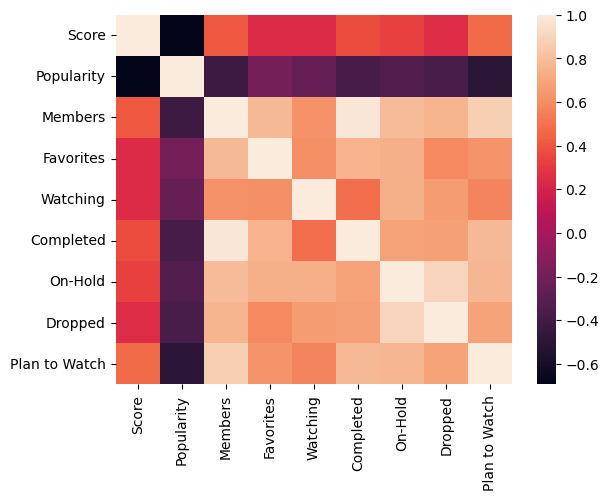

In [ ]:
import seaborn as sns
sns.heatmap(new_df.iloc[:,1:].corr())